In [59]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
sns.set_style('whitegrid')

**Binary classifier:**

In [60]:
x = np.array([[3,2],[4,-1], [- 1, 3], [1.5, 1.5], [2, 3.5], [-1.5, -1], [1, -0.5], [2, -3], [4.5, -2]])
X = pd.DataFrame(x, columns=['x11', 'x12'])

theta = np.array([- 1, 1.5]).reshape(2, 1)
theta_null = 3
h = []

for i in range(x.shape[0]):
    y = x[i,:].reshape(2, 1)
    z = np.matmul(theta.T, y) + theta_null
    h.append(np.sign(z)[0][0])
    
X = X.assign(h = h)

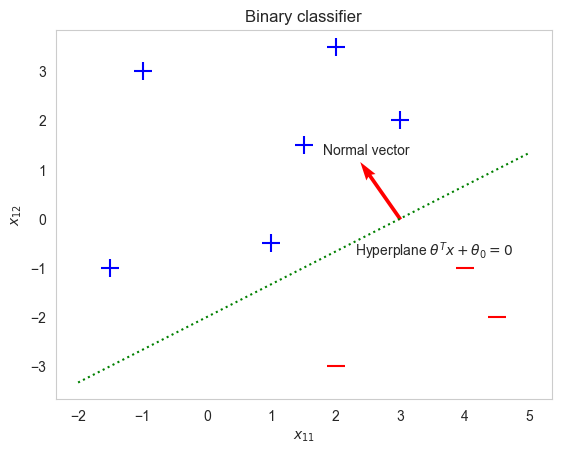

In [61]:
plt.scatter(X[X['h'] > 0]['x11'], X[X['h'] > 0]['x12'], marker='+', s=150, c='b')
plt.scatter(X[X['h'] < 0]['x11'], X[X['h'] < 0]['x12'], marker='_', s=150, c='r')
plt.plot(np.linspace(-2, 5, num=10), (np.linspace(-2, 5, num=10) - 3)/1.5, 'g:')
plt.text(2.3, -0.75, 'Hyperplane $\\theta^T x + \\theta_0 = 0$')

plt.quiver(3, 0, - 0.7, 1, color='r', units='xy', scale=1)
plt.text(1.8, 1.3, 'Normal vector')

plt.xlabel('$x_{11}$')
plt.ylabel('$x_{12}$')
plt.title('Binary classifier')
plt.grid()
plt.show() 

**Perceptron Algorithm:**

In [62]:
x = np.array([[1,3],[2.5, 1.5], [-1.5, 1.5]])
y = [1, 1, - 1]

X = pd.DataFrame(x, columns=['x11', 'x12'])
X = X.assign(y = y)

In [63]:
theta = np.array([1, - 1]).reshape(2, 1)
theta_null = 1
changed = False

for t in range(100):
    for i in range(x.shape[0]):
        dummy = X['y'][i]*np.matmul(theta.T, x[i,:].reshape(2, 1)) + theta_null
        if dummy <= 0:
            theta = theta + X['y'][i]*x[i,:].reshape(2, 1)
            theta_null = theta_null + X['y'][i]
            changed = True
    if changed == False:
        break

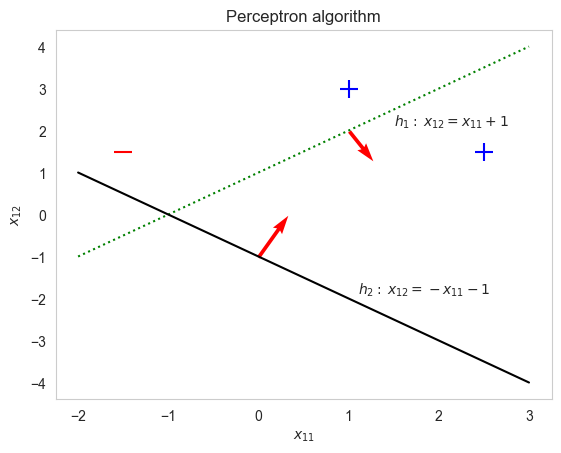

In [64]:
plt.scatter(X[X['y'] > 0]['x11'], X[X['y'] > 0]['x12'], marker='+', s=150, c='b')
plt.scatter(X[X['y'] < 0]['x11'], X[X['y'] < 0]['x12'], marker='_', s=150, c='r')

plt.plot(np.linspace(-2, 3, num=10), np.linspace(-2, 3, num=10) + 1, 'g:')
plt.text(1.5, 2.1, '$h_1:$ $x_{12} = x_{11} + 1$')
plt.quiver(1, 2, 0.4, -0.5, color='r', units='xy', scale=1)

plt.plot(np.linspace(-2, 3, num=10), - np.linspace(-2, 3, num=10) - 1, 'k')
plt.text(1.1, -1.9, '$h_2:$ $x_{12} = - x_{11} - 1$')
plt.quiver(0, -1, 0.5, 0.7, color='r', units='xy', scale=1)

plt.xlabel('$x_{11}$')
plt.ylabel('$x_{12}$')
plt.title('Perceptron algorithm')
plt.grid()
plt.show()

**Perceptron through origin (w/o an offset term):**

In [65]:
X = np.array([[1], [2], [3], [4]]).reshape(4, 1)
Y = np.array([[1], [1], [-1], [-1]])

X_new = np.append(X, np.ones((4, 1)), axis=1)
theta = np.zeros(2).reshape(2, 1)

for t in range(10):
    for i in range(X_new.shape[0]):
        dummy = Y[i, 0]*np.matmul(theta.T, X_new[i].reshape(2, 1))
        if dummy <= 0:
            theta = theta + Y[i,0]*X_new[i].reshape(2, 1)

Text(0, 0.5, '$x_{12}$')

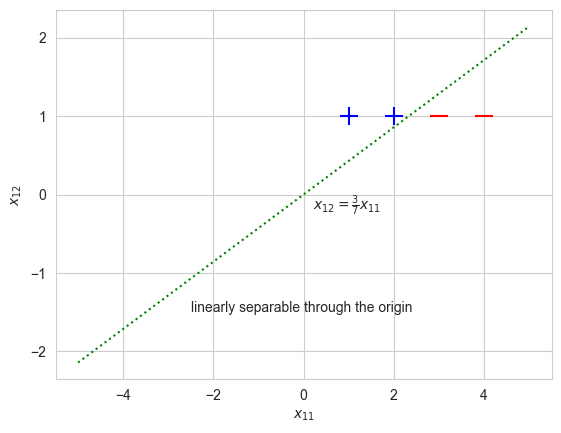

In [69]:
df = pd.DataFrame(X_new, columns=['x11', 'x12'])
df = df.assign(y = Y)

plt.scatter(df[df['y'] > 0]['x11'], df[df['y'] > 0]['x12'], marker='+', s=150, c='b')
plt.scatter(df[df['y'] < 0]['x11'], df[df['y'] < 0]['x12'], marker='_', s=150, c='r')
plt.plot(np.linspace(-5, 5, num=10), (3/7)*np.linspace(-5, 5, num=10), 'g:')
plt.text(0.2, -0.2, '$x_{12} = \\frac{3}{7} x_{11}$')
plt.text(- 2.5, -1.5, 'linearly separable through the origin')
plt.xlabel('$x_{11}$')
plt.ylabel('$x_{12}$')

**The Palmer penguins dataset:**

* Typical real data sets aren’t linearly separable!

In [54]:
from palmerpenguins import load_penguins
penguins = load_penguins()

penguins_species = np.unique(penguins['species'])
penguins['y_label'] = penguins['species'].map({penguins_species[0]:0, penguins_species[1]:1, penguins_species[2]:2})
display(penguins.iloc[:5])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,y_label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0


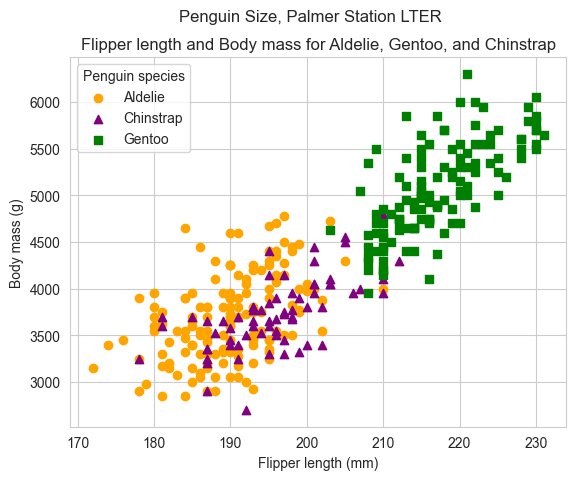

In [50]:
plt.scatter(penguins['flipper_length_mm'][penguins['y_label']==0], penguins['body_mass_g'][penguins['y_label']==0], c='orange', marker='o', label = 'Aldelie')
plt.scatter(penguins['flipper_length_mm'][penguins['y_label']==1], penguins['body_mass_g'][penguins['y_label']==1], c='purple', marker='^', label = 'Chinstrap')
plt.scatter(penguins['flipper_length_mm'][penguins['y_label']==2], penguins['body_mass_g'][penguins['y_label']==2], c='green', marker='s', label = 'Gentoo')

plt.xlabel('Flipper length (mm)')
plt.ylabel('Body mass (g)')
plt.suptitle('Penguin Size, Palmer Station LTER')
plt.title('Flipper length and Body mass for Aldelie, Gentoo, and Chinstrap')
plt.legend(title='Penguin species')